# Data cleaning

This notebook imports a dataset with information about books, and cleans the data to be used in a recommendation system, as well as exploring some of the data columns to better understand the dataset at hand

### Data cleaning and dimensions

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Path to the data
file_path = "../data/books_dataset.csv"

# Read the CSV file into a DataFrame
books_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data has been read properly
books_df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [3]:
# Analalyse the data
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [4]:
# Count the number of rows in the DataFrame
num_rows = books_df.shape[0]
print("Number of rows in the DataFrame:", num_rows)

Number of rows in the DataFrame: 6810


In [5]:
num_unique_authors = books_df['authors'].nunique()
print("Number of unique authors:", num_unique_authors)

Number of unique authors: 3780


In [6]:
# Count the number of unique values in the "categories" column
num_unique_categories = books_df['categories'].nunique()
print("Number of unique categories:", num_unique_categories)

Number of unique categories: 567


In [7]:
# Drop rows with null values in specified columns (that will be relevant for the clustering algorithm and/or website)
cleaned_books_df = books_df.dropna(subset=['authors', 'categories', 'average_rating', 'num_pages', 'ratings_count', 'published_year', 'thumbnail'])

# Reset the index of the DataFrame after dropping rows
cleaned_books_df.reset_index(drop=True, inplace=True)

# Print the first few rows of the cleaned DataFrame to verify
cleaned_books_df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [8]:
# Check the number of rows in the cleaned dataframe, as well as unique num of authors and categories
num_rows1 = cleaned_books_df.shape[0]
num_unique_authors1 = cleaned_books_df['authors'].nunique()
num_unique_categories1 = cleaned_books_df['categories'].nunique()

print("Number of rows in the DataFrame:", num_rows1)
print("Number of unique authors:", num_unique_authors1)
print("Number of unique categories:", num_unique_categories1)

Number of rows in the DataFrame: 6340
Number of unique authors: 3626
Number of unique categories: 509


In [9]:
# Save cleaned df to csv
cleaned_books_df.to_csv("../data/cleaned_data.csv")

### Looking into authors, categories, published year, and ratings

In [10]:
# What are the most frequent authors in the data?

# Split the 'authors' column by ';' to account for multiple authors in the same cell
authors_expanded = cleaned_books_df['authors'].str.split(';').explode()

# Counting: number of unique authors
unique_authors_count = authors_expanded.nunique()

# Finding the 10 most frequent authors
most_frequent_authors = authors_expanded.value_counts().head(10)

print(f'Number of unique authors: {unique_authors_count}')
print('')
print('Most frequent authors:')
print(most_frequent_authors)

Number of unique authors: 4286

Most frequent authors:
authors
William Shakespeare          44
Stephen King                 40
Agatha Christie              39
John Ronald Reuel Tolkien    32
Virginia Woolf               28
Mercedes Lackey              25
Janet Evanovich              25
Sandra Brown                 24
Margaret Weis                23
Plato                        21
Name: count, dtype: int64


In [11]:
# Exploding the genres column 
genre_data = cleaned_books_df.explode('categories')

# Grouping by release year and genres, then counting
genre_count_over_years = genre_data.groupby(['published_year', 'categories']).size().reset_index(name='count')

In [12]:
# Calculate the total count for each genre
total_count_per_genre = genre_count_over_years.groupby('categories')['count'].sum()

# Identify the top 10 genres based on the total count
top_10_genres = total_count_per_genre.nlargest(10)

# Convert to a DataFrame 
top_10_genres_df = top_10_genres.reset_index().set_index('categories')
top_10_genres_df

,count
categories,
Fiction,2495
Juvenile Fiction,506
Biography & Autobiography,387
History,258
Literary Criticism,162
Philosophy,156
Comics & Graphic Novels,138
Religion,137
Drama,126


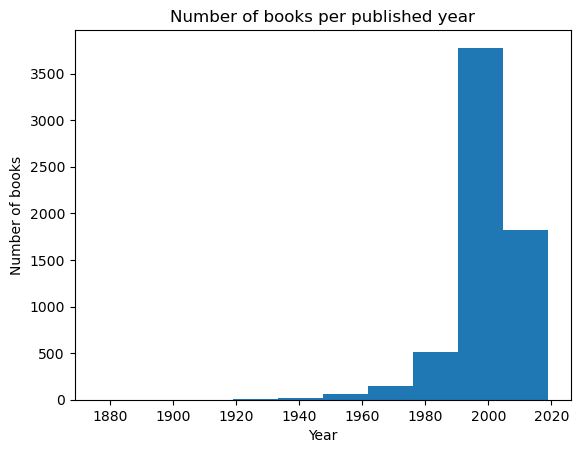

In [13]:
# Check distribution of published_year
plt.hist(cleaned_books_df["published_year"])

# Add title and axis names
plt.title('Number of books per published year')
plt.xlabel('Year')
plt.ylabel('Number of books')

# Display histogram
plt.show()

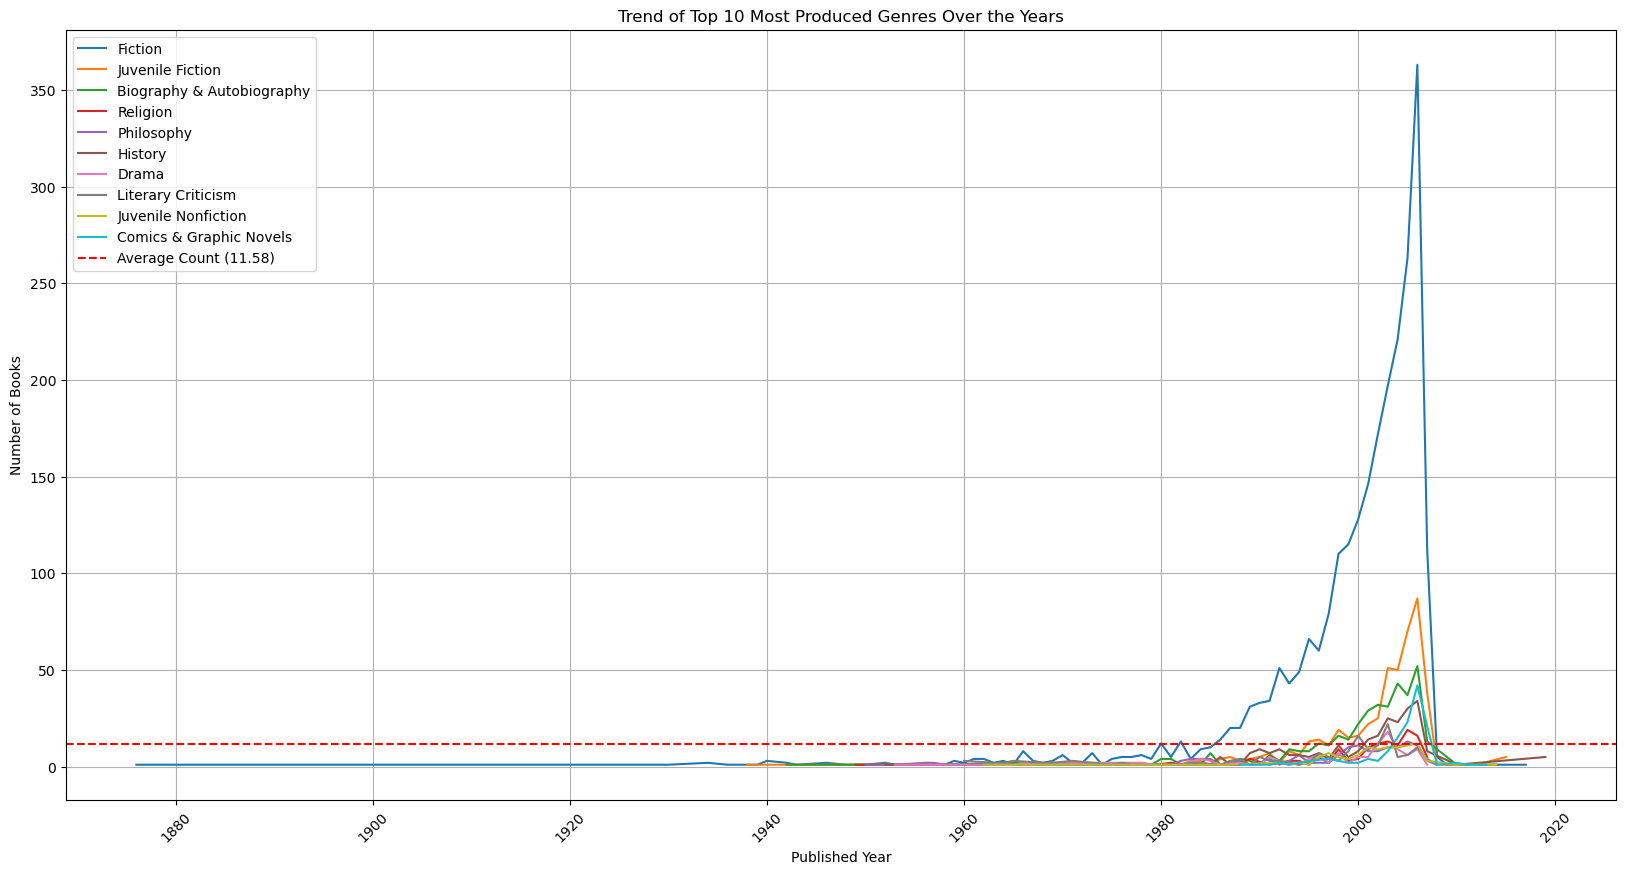

In [14]:
#Plot a line graph to show the trends in the top ten genres

# Filter the dataset to include only the top 10 genres
top_genres_data = genre_count_over_years[genre_count_over_years['categories'].isin(top_10_genres.index)]

# Calculate the average count of shows for the top 10 genres
average_count_top_genres = top_genres_data['count'].mean()

# Plotting the trend of the top 10 genres over the years
plt.figure(figsize=(20, 10))
sns.lineplot(data=top_genres_data, x="published_year", y="count", hue="categories")
plt.title('Trend of Top 10 Most Produced Genres Over the Years')
plt.xlabel('Published Year')
plt.ylabel('Number of Books')
plt.legend(title='Top 10 Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)

# Adding a horizontal line at the average count
plt.axhline(y=average_count_top_genres, color='red', linestyle='--', label=f'Average Count ({average_count_top_genres:.2f})')
plt.legend()

# Show the plot
plt.show()

In [15]:
# Filter out data below 1980
filtered_data = cleaned_books_df.loc[cleaned_books_df['published_year']>=1980]
filtered_data = filtered_data.reset_index(drop=True)

In [16]:
# Exploding the genres column 
genre_data = filtered_data.explode('categories')

# Grouping by release year and genres, then counting
genre_count_over_years = genre_data.groupby(['published_year', 'categories']).size().reset_index(name='count')

In [17]:
# Calculate the total count for each genre
total_count_per_genre = genre_count_over_years.groupby('categories')['count'].sum()

In [18]:
# Identify the top 10 genres based on the total count
top_10_genres = total_count_per_genre.nlargest(10)

# Convert to a DataFrame 
top_10_genres_df = top_10_genres.reset_index().set_index('categories')
top_10_genres_df

,count
categories,
Fiction,2390
Juvenile Fiction,493
Biography & Autobiography,378
History,251
Comics & Graphic Novels,138
Literary Criticism,138
Philosophy,137
Religion,130
Drama,111


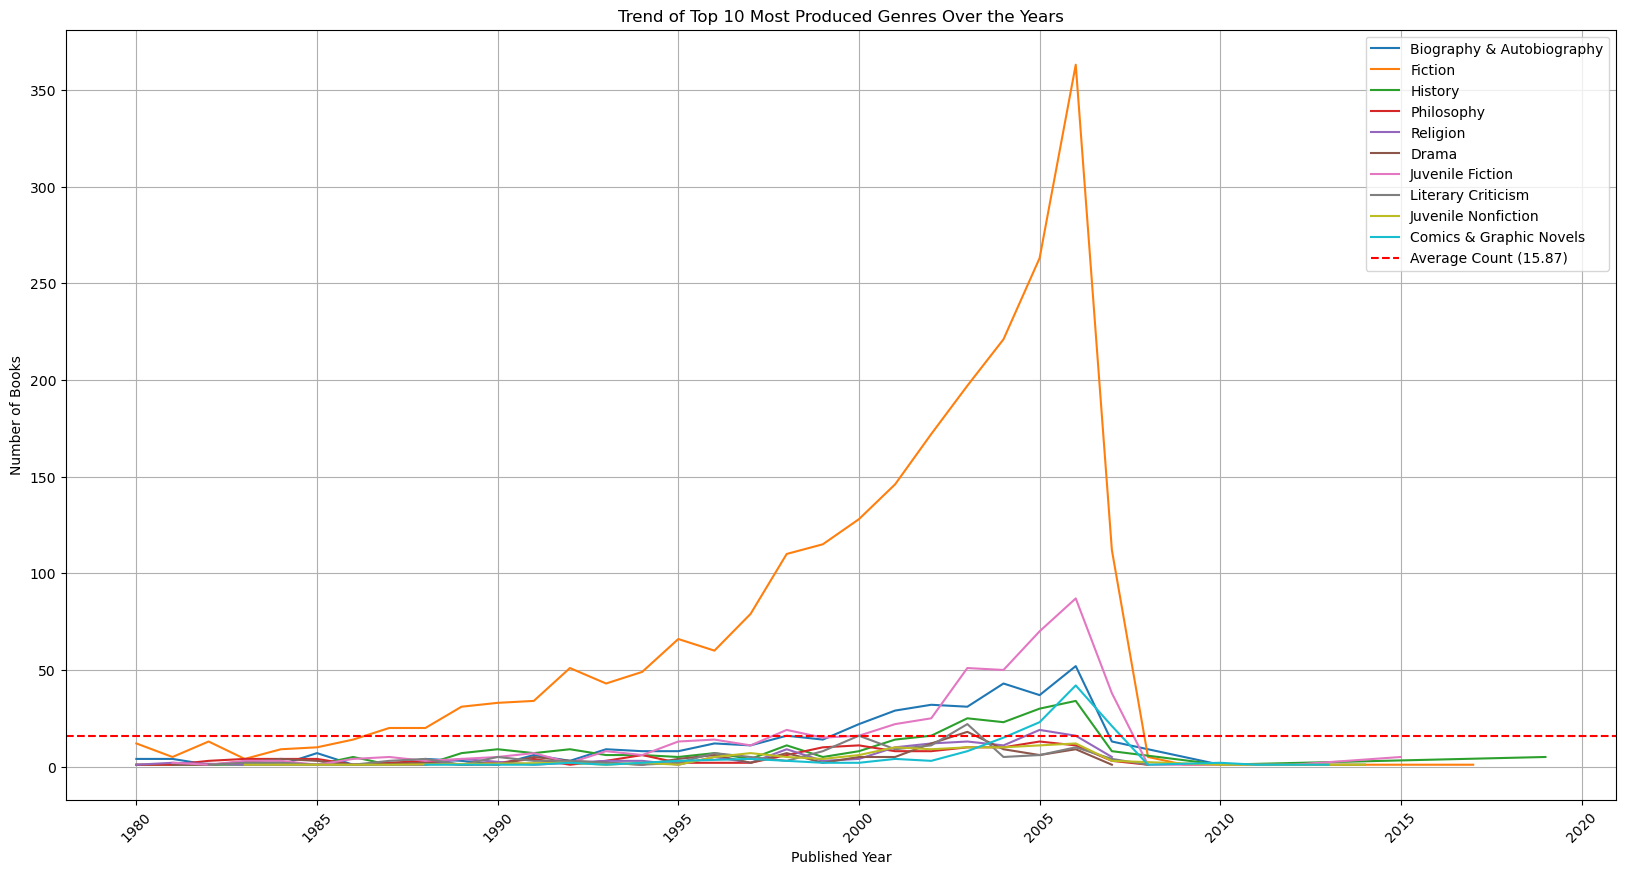

In [19]:
# Plot graph again

# Filter the dataset to include only the top 10 genres
top_genres_data = genre_count_over_years[genre_count_over_years['categories'].isin(top_10_genres.index)]

# Calculate the average count of shows for the top 10 genres
average_count_top_genres = top_genres_data['count'].mean()

# Plotting the trend of the top 10 genres over the years
plt.figure(figsize=(20, 10))
sns.lineplot(data=top_genres_data, x="published_year", y="count", hue="categories")
plt.title('Trend of Top 10 Most Produced Genres Over the Years')
plt.xlabel('Published Year')
plt.ylabel('Number of Books')
plt.legend(title='Top 10 Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)

# Adding a horizontal line at the average count
plt.axhline(y=average_count_top_genres, color='red', linestyle='--', label=f'Average Count ({average_count_top_genres:.2f})')
plt.legend()

# Show the plot
plt.show()

In [20]:
# What is the average rating in the dataset?
av_rating = books_df["average_rating"].mean()
print ("The average rating is:", av_rating)

The average rating is: 3.933283582089552


In [21]:
# What is the average rating by category?
group_genre = books_df["average_rating"].groupby(books_df["categories"]).mean()
group_sorted = group_genre.sort_values(ascending=False)

group_sorted.head(10)

categories
Botanique                                            5.00
Spiritual life                                       5.00
Existentialism                                       4.91
Imaginary wars and battles                           4.59
Argentine literature                                 4.54
Characters and characteristics in motion pictures    4.54
Mississippi                                          4.54
Zoology                                              4.52
Costume                                              4.52
Chrestomanci (Fictitious character)                  4.50
Name: average_rating, dtype: float64

### Main takeaways:

- The original dataset is composed of 6810 entries. After eliminating empty rows on the relevant columns, the data to be used in the recommendation system has 6340 entries. 
- There are 4286 unique authors in the (cleaned) dataset, the most frequent being William Shakespeare, Stephen King and Agatha Cristie. 
- There are 509 unique categories (that is, book genres), with the most common being fiction, juvenile fiction and Biography & Autobiography.
- Most books in the dataset were published after 1980.
- The average book rating in the dataset is of 3.93. The highest rated books fall in the categories of Botanique, Spiritual Life and Existentialism